In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the adjusted dataset
df = pd.read_csv("premier_league_adjusted.csv")

#### Average attendance across seasons

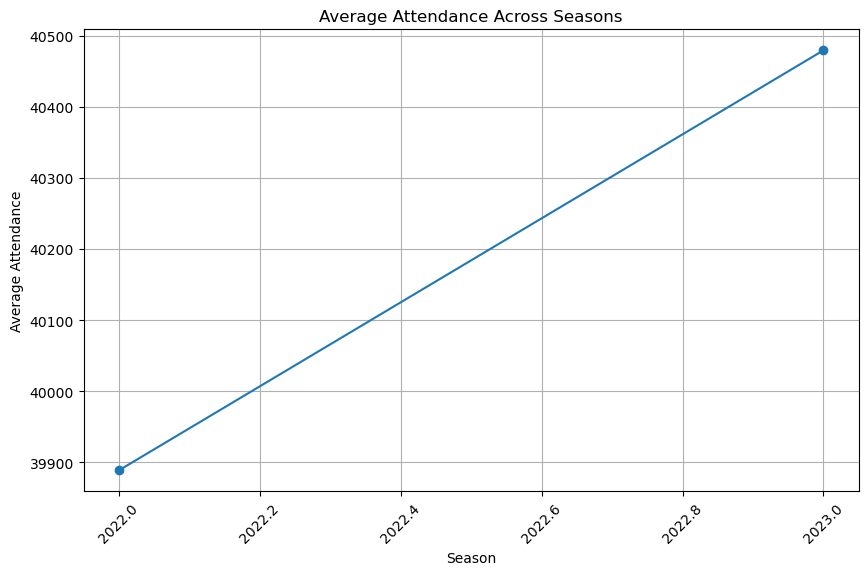

In [10]:
# Extract the year from the 'Date' column to create a 'Season' column
df['Season'] = df['Date'].dt.year

# Calculate the average attendance for each season
avg_attendance_by_season = df.groupby('Season')['Attendance'].mean()

# Plot the average attendance across seasons
plt.figure(figsize=(10, 6))
plt.plot(avg_attendance_by_season.index, avg_attendance_by_season.values, marker='o', linestyle='-')
plt.title('Average Attendance Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Highest number of goals scored in total in one season

In [24]:
# Extract the year from the 'Date' column to create a 'Season' column
df['Season'] = df['Date'].dt.year

# Group the data by 'Season' and calculate the total number of goals scored in each season
goals_by_season = df.groupby('Season')['Score'].apply(lambda x: np.sum([int(score.split('-')[0]) + int(score.split('-')[1]) for score in x]))

# Find the season with the highest total number of goals scored
highest_goals_season = goals_by_season.idxmax()
highest_goals_count = goals_by_season.max()

print(f"The season with the highest number of goals scored was {highest_goals_season} with a total of {highest_goals_count} goals.")

The season with the highest number of goals scored was 2023 with a total of 3060 goals.


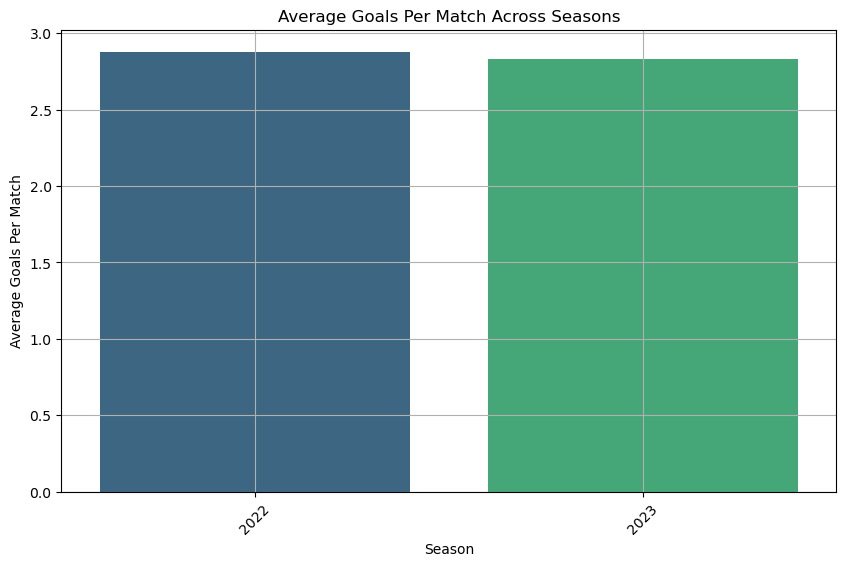

In [23]:
# Extract the year from the 'Date' column to create a 'Season' column
df['Season'] = df['Date'].dt.year

# Correct the score format to use a hyphen (-)
df['Score'] = df['Score'].str.replace('–', '-')

# Calculate the total number of goals scored in each match
df['Total_Goals'] = df['Score'].str.split('-').apply(lambda s: int(s[0]) + int(s[1]))

# Calculate the average goals per match for each season
avg_goals_per_match_by_season = df.groupby('Season')['Total_Goals'].mean()

# Plot the average goals per match across seasons
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_goals_per_match_by_season.index, y=avg_goals_per_match_by_season.values, palette="viridis")
plt.title('Average Goals Per Match Across Seasons')
plt.xlabel('Season')
plt.ylabel('Average Goals Per Match')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()